In [2]:
%pylab inline
%run params.py

import matplotlib.pyplot as plt
import pandas as pd
import random
import os
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from plotting_functions import *

# Load all the data
data = LoadMLData(os.path.join(DATAPATH, "autosomal_estimates/perlocus/", "autosomal_estimates_ml_filtered.bed.gz"))
data["chrom"] = data["chrom"].apply(str)
willems = pd.read_csv(os.path.join("../analyses/autosomal_perlocus","willems_etal_predictions.txt"), sep="\t")
willems["chrom"] = willems["CHROM"].apply(lambda x: (x[3:]))
willems["start"] = willems["HG19_START"]
willems["logmu_willems"] = np.log10(willems["EST_MUT_RATE_MPG"])
data = pd.merge(data, willems[["chrom","start","logmu_willems"]], on=["chrom","start"])

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [8]:
data.columns

Index([u'chrom', u'start', u'end', u'est_logmu_ml', u'est_beta_eff_ml',
       u'est_beta_ml', u'est_pgeom_ml', u'stderr_ml', u'numsamples_ml',
       u'logmu_willems'],
      dtype='object')

(0.65108053221667361, 0.0) 487108


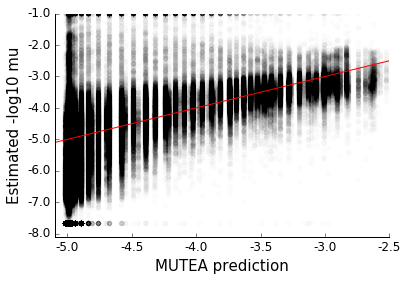

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(fdata.logmu_willems, fdata.est_logmu_ml, color="black", alpha=0.01)
ax.plot([-6,-2],[-6,-2], color="red")
ax.set_xlim(left=-5.1, right=-2.5)
ax.set_ylim(bottom=-8.1, top=-1)
ax.set_xlabel("MUTEA prediction", size=15)
ax.set_ylabel("Estimated -log10 mu", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12);
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure11_CompareToMutea.png"))
print scipy.stats.pearsonr(fdata.logmu_willems, fdata.est_logmu_ml), data.shape[0]